绿色生产决策问题：某工厂生产两种产品，需要同时优化两个冲突目标：

目标1：最大化利润（产品1利润3元/单位，产品2利润2元/单位）
目标2：最小化污染（产品1污染1单位/单位，产品2污染3单位/单位）
约束条件：

原料约束：x₁ + x₂ ≤ 10
工时约束：2x₁ + x₂ ≤ 15
非负约束：x₁, x₂ ≥ 0

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.termination import get_termination
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.core.sampling import Sampling
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

In [5]:
class GreenProductionProblem(Problem):
    def __init__(self):
        # 2个决策变量 (x1, x2)
        # 2个目标函数 (利润最大化, 污染最小化)
        super().__init__(n_var=2, n_obj=2, n_constr=2, 
                         xl=np.array([0, 0]), 
                         xu=np.array([10, 10]))
    
    def _evaluate(self, x, out, *args, **kwargs):
        # 目标函数
        # 注意：pymoo默认最小化所有目标，所以最大化利润需要取负
        f1 = -(3 * x[:, 0] + 2 * x[:, 1])  # 负利润（因为我们要最小化）
        f2 = x[:, 0] + 3 * x[:, 1]          # 污染
        
        # 约束条件 (必须≤0)
        g1 = x[:, 0] + x[:, 1] - 10         # 原料约束
        g2 = 2 * x[:, 0] + x[:, 1] - 15     # 工时约束
        
        out["F"] = np.column_stack([f1, f2])
        out["G"] = np.column_stack([g1, g2])

In [6]:
# 2. 初始化问题和算法
problem = GreenProductionProblem()
algorithm = NSGA2(
    pop_size=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

# 3. 运行优化
termination = get_termination("n_gen", 50)
res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |     12 |  0.000000E+00 |  4.4204671787 |             - |             -
     2 |      200 |     18 |  0.000000E+00 |  0.000000E+00 |  0.0163114333 |         ideal
     3 |      300 |     31 |  0.000000E+00 |  0.000000E+00 |  0.0267331202 |         ideal
     4 |      400 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0078395609 |             f
     5 |      500 |     51 |  0.000000E+00 |  0.000000E+00 |  0.0225623477 |         ideal
     6 |      600 |     68 |  0.000000E+00 |  0.000000E+00 |  0.0084228342 |         ideal
     7 |      700 |     82 |  0.000000E+00 |  0.000000E+00 |  0.0034016537 |         ideal
     8 |      800 |     92 |  0.000000E+00 |  0.000000E+00 |  0.0025045614 |             f
     9 |      900 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0089163079 |         ideal
    10 |     1000 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0015403349 |             f

/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_18329/571861266.py:52: UserWarning: Glyph 20135 (\N{CJK UNIFIED IDEOGRAPH-4EA7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_18329/571861266.py:52: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_18329/571861266.py:52: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_18329/571861266.py:52: UserWarning: Glyph 20915 (\N{CJK UNIFIED IDEOGRAPH-51B3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_18329/571861266.py:52: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4

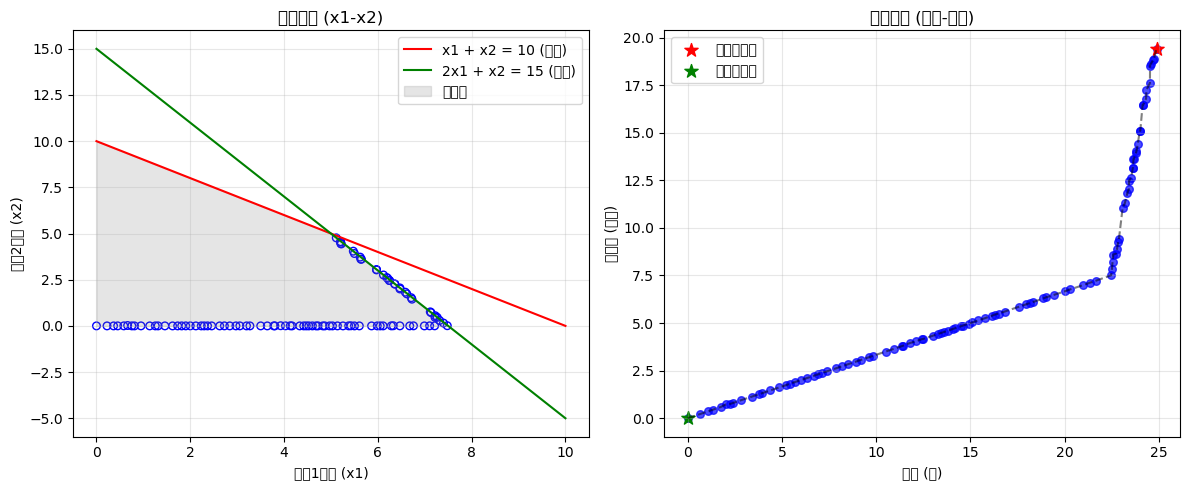

In [7]:
# 4. 可视化结果
# 4.1 决策空间可视化
X = res.X
F = res.F

# 创建决策空间图
plt.figure(figsize=(12, 5))

# 子图1：决策空间
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title('决策空间 (x1-x2)')
plt.xlabel('产品1产量 (x1)')
plt.ylabel('产品2产量 (x2)')
plt.grid(True, alpha=0.3)

# 绘制约束边界
x1 = np.linspace(0, 10, 100)
plt.plot(x1, 10 - x1, 'r-', label='x1 + x2 = 10 (原料)')
plt.plot(x1, 15 - 2*x1, 'g-', label='2x1 + x2 = 15 (工时)')
plt.fill_between(x1, 0, np.minimum(10 - x1, 15 - 2*x1), where=(15-2*x1)>=0, 
                 alpha=0.2, color='gray', label='可行域')
plt.legend()

# 4.2 目标空间可视化 (Pareto前沿)
plt.subplot(1, 2, 2)
# 注意：F[:,0]是负利润，所以需要取负得到实际利润
actual_profit = -F[:, 0]
pollution = F[:, 1]

plt.scatter(actual_profit, pollution, s=30, c='blue', alpha=0.7)
plt.title('目标空间 (利润-污染)')
plt.xlabel('利润 (元)')
plt.ylabel('污染量 (单位)')
plt.grid(True, alpha=0.3)

# 标记几个关键点
best_profit_idx = np.argmax(actual_profit)
best_pollution_idx = np.argmin(pollution)
mid_idx = len(X)//2

plt.scatter(actual_profit[best_profit_idx], pollution[best_profit_idx], 
            s=100, c='red', marker='*', label='最大利润解')
plt.scatter(actual_profit[best_pollution_idx], pollution[best_pollution_idx], 
            s=100, c='green', marker='*', label='最小污染解')

# 添加连接线表示权衡
sorted_idx = np.argsort(actual_profit)
plt.plot(actual_profit[sorted_idx], pollution[sorted_idx], 'k--', alpha=0.5)

plt.legend()
plt.tight_layout()
plt.show()


In [8]:
# 5. 分析关键解
print("="*50)
print("Pareto最优解分析:")
print("="*50)

# 最大利润解
max_profit_idx = np.argmax(actual_profit)
print(f"\n1. 最大利润解 (激进策略):")
print(f"   - 产品1产量: {X[max_profit_idx, 0]:.2f} 单位")
print(f"   - 产品2产量: {X[max_profit_idx, 1]:.2f} 单位")
print(f"   - 总利润: {actual_profit[max_profit_idx]:.2f} 元")
print(f"   - 污染量: {pollution[max_profit_idx]:.2f} 单位")

# 最小污染解
min_pollution_idx = np.argmin(pollution)
print(f"\n2. 最小污染解 (环保策略):")
print(f"   - 产品1产量: {X[min_pollution_idx, 0]:.2f} 单位")
print(f"   - 产品2产量: {X[min_pollution_idx, 1]:.2f} 单位")
print(f"   - 总利润: {actual_profit[min_pollution_idx]:.2f} 元")
print(f"   - 污染量: {pollution[min_pollution_idx]:.2f} 单位")

# 平衡解（取利润中位数附近的解）
mid_profit = np.median(actual_profit)
balanced_idx = np.argmin(np.abs(actual_profit - mid_profit))
print(f"\n3. 平衡策略解:")
print(f"   - 产品1产量: {X[balanced_idx, 0]:.2f} 单位")
print(f"   - 产品2产量: {X[balanced_idx, 1]:.2f} 单位")
print(f"   - 总利润: {actual_profit[balanced_idx]:.2f} 元")
print(f"   - 污染量: {pollution[balanced_idx]:.2f} 单位")

Pareto最优解分析:

1. 最大利润解 (激进策略):
   - 产品1产量: 5.11 单位
   - 产品2产量: 4.77 单位
   - 总利润: 24.87 元
   - 污染量: 19.41 单位

2. 最小污染解 (环保策略):
   - 产品1产量: 0.00 单位
   - 产品2产量: 0.00 单位
   - 总利润: 0.00 元
   - 污染量: 0.00 单位

3. 平衡策略解:
   - 产品1产量: 5.14 单位
   - 产品2产量: 0.00 单位
   - 总利润: 15.42 元
   - 污染量: 5.14 单位



目标规划法：设定目标值求解
目标：利润 ≥ 20元，污染 ≤ 15单位
最佳平衡解 (最小化目标偏差):
   - 产品1产量: 6.73 单位
   - 产品2产量: 1.45 单位
   - 实际利润: 23.07 元 (目标偏差: 0.00)
   - 实际污染: 11.07 单位 (目标偏差: 0.00)
   - 总偏差: 0.00


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35268 (\N{CJK UNIFIED IDEOGRAPH-89C4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21010 (\N{CJK UNIFIED IDEOGRAPH-5212}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36798 (\N{CJK UNIFIED IDEOGRAPH-8FBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaV

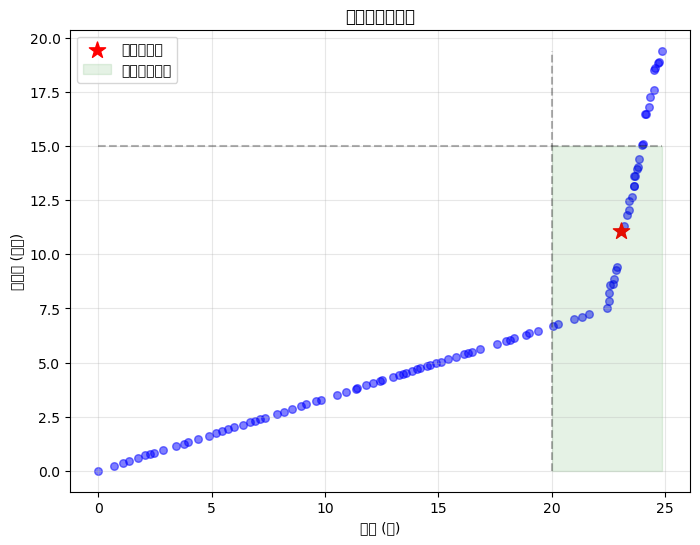

In [9]:
# 6. 决策者偏好分析（目标规划法）
print("\n" + "="*50)
print("目标规划法：设定目标值求解")
print("="*50)

# 假设决策者希望：利润 ≥ 20元，污染 ≤ 15单位
target_profit = 20
target_pollution = 15

# 计算各解的偏差
profit_dev = np.maximum(0, target_profit - actual_profit)
pollution_dev = np.maximum(0, pollution - target_pollution)
total_dev = profit_dev + pollution_dev

# 找到最小化总偏差的解
best_idx = np.argmin(total_dev)

print(f"目标：利润 ≥ {target_profit}元，污染 ≤ {target_pollution}单位")
print(f"最佳平衡解 (最小化目标偏差):")
print(f"   - 产品1产量: {X[best_idx, 0]:.2f} 单位")
print(f"   - 产品2产量: {X[best_idx, 1]:.2f} 单位")
print(f"   - 实际利润: {actual_profit[best_idx]:.2f} 元 (目标偏差: {profit_dev[best_idx]:.2f})")
print(f"   - 实际污染: {pollution[best_idx]:.2f} 单位 (目标偏差: {pollution_dev[best_idx]:.2f})")
print(f"   - 总偏差: {total_dev[best_idx]:.2f}")

# 在图上标记这个解
plt.figure(figsize=(8, 6))
plt.scatter(actual_profit, pollution, s=30, c='blue', alpha=0.5)
plt.scatter(actual_profit[best_idx], pollution[best_idx], 
            s=150, c='red', marker='*', label='目标规划解')
plt.plot([target_profit, target_profit], [0, max(pollution)], 'k--', alpha=0.3)
plt.plot([0, max(actual_profit)], [target_pollution, target_pollution], 'k--', alpha=0.3)
plt.fill_between([target_profit, max(actual_profit)], 0, target_pollution, 
                 alpha=0.1, color='green', label='目标达成区域')
plt.title('目标规划解位置')
plt.xlabel('利润 (元)')
plt.ylabel('污染量 (单位)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()